In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm 

import distfit as fit 

In [2]:
data = pd.read_csv('/Users/cyc/Documents/01/Manchester/courses/24_simulation/simulation_coursework/CAR-T ICU durations.csv')

In [3]:
data.head()

,Duration
0,10.34
1,13.69
2,11.10
3,0.00
4,8.69


In [4]:
data.shape

(133, 1)

### initial fitting

<AxesSubplot:xlabel='Duration', ylabel='Count'>

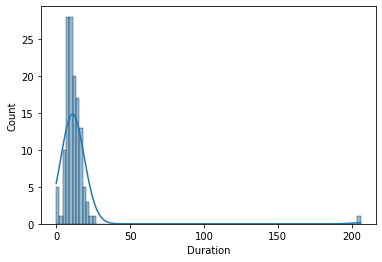

In [5]:
sns.histplot(data=data,x='Duration',kde=True)

In [6]:
#Fitting some theoretical distributions to the empirical data
dfit = fit.distfit(distr=["lognorm","weibull_min","gamma","norm","uniform","expon"],alpha=0.05)

In [8]:
# Fit
dfit.fit_transform(data["Duration"])

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm    ] [0.03 sec] [RSS: 0.00353213] [loc=-4.784 scale=15.576]
[distfit] >INFO> [weibull_min] [0.01 sec] [RSS: 0.011775] [loc=-0.119 scale=13.771]
[distfit] >INFO> [gamma      ] [0.06 sec] [RSS: 0.0288909] [loc=-0.000 scale=1.639]
[distfit] >INFO> [norm       ] [0.00 sec] [RSS: 0.0157902] [loc=12.709 scale=17.440]
[distfit] >INFO> [uniform    ] [0.00 sec] [RSS: 0.0270244] [loc=0.000 scale=206.000]
[distfit] >INFO> [expon      ] [0.00 sec] [RSS: 0.0160211] [loc=0.000 scale=12.709]
[distfit] >INFO> Compute confidence intervals [parametric]


{'model': {'name': 'lognorm',
  'score': 0.003532129653170751,
  'loc': -4.784389843189556,
  'scale': 15.576424173551157,
  'arg': (0.4007156878773195,),
  'params': (0.4007156878773195, -4.784389843189556, 15.576424173551157),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x12c937b10>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 3.273404365024051,
  'CII_max_alpha': 25.326206650708507},
 'summary':           name       score          loc    scale                      arg  \
 0      lognorm  0.00353213     -4.78439  15.5764    (0.4007156878773195,)   
 1  weibull_min    0.011775      -0.1194  13.7706     (1.203028351735507,)   
 2         norm   0.0157902      12.7088  17.4401                       ()   
 3        expon   0.0160211            0  12.7088                       ()   
 4      uniform   0.0270244            0      206                       ()   
 5        gamma   0.0288909 -8.99464e-28  1.63928  (0.047472892815898

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-4.784390, scale:15.576424)
[distfit] >INFO> Create cdf plot for the parametric method.
[distfit] >INFO> Ploting CDF


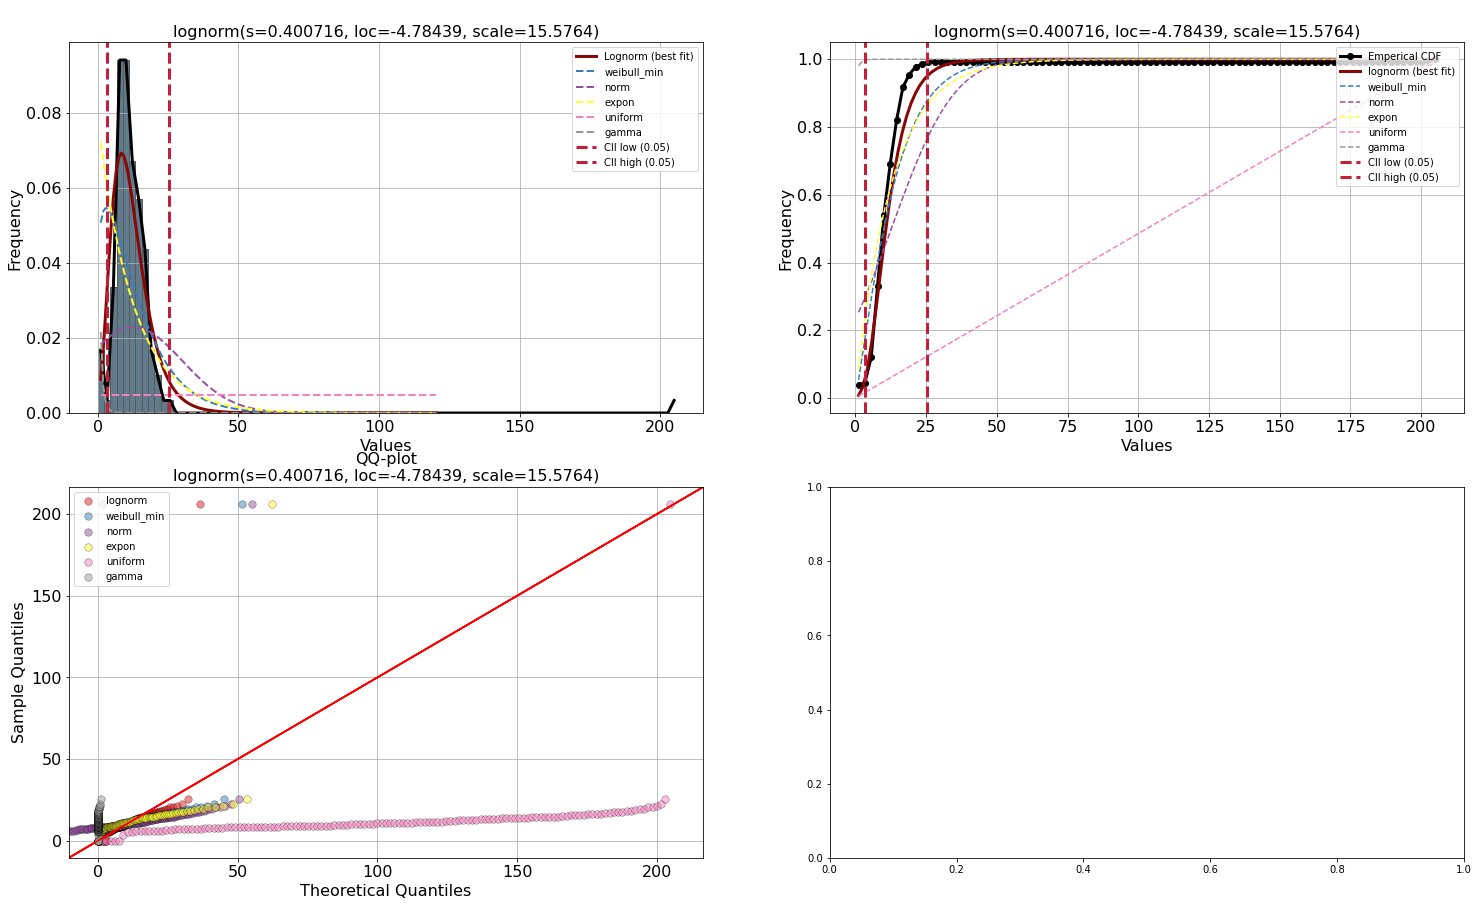

In [10]:
fig, axs = plt.subplots(2,2, figsize=(25,15))
fig, ax  = dfit.plot(chart='pdf', n_top=6,ax=axs[0, 0])
fig, ax  = dfit.plot(chart='cdf', n_top=6,ax=axs[0, 1])
fig, ax  = dfit.qqplot(data['Duration'], n_top=6,ax=axs[1, 0])

In [11]:
dfit.summary

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,lognorm,0.00353213,-4.78439,15.5764,"(0.4007156878773195,)","(0.4007156878773195, -4.784389843189556, 15.57...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#e41a1c
1,weibull_min,0.011775,-0.1194,13.7706,"(1.203028351735507,)","(1.203028351735507, -0.1193999670836439, 13.77...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#377eb8
2,norm,0.0157902,12.7088,17.4401,(),"(12.708796992481203, 17.440120026040464)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#984ea3
3,expon,0.0160211,0,12.7088,(),"(0.0, 12.708796992481203)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#ffff33
4,uniform,0.0270244,0,206,(),"(0.0, 206.0)",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#f781bf
5,gamma,0.0288909,-8.99464e-28,1.63928,"(0.047472892815898185,)","(0.047472892815898185, -8.994638742245634e-28,...",<scipy.stats._distn_infrastructure.rv_frozen o...,0,None,#999999


### remove outlier

In [16]:
data.describe()

,Duration
count,133.000000
mean,12.708797
std,17.506056
min,0.000000
25%,8.530000
50%,10.890000
75%,14.280000
max,206.000000


In [17]:
data[data['Duration']==206]

,Duration
104,206.0


In [19]:
data.drop(index=104, axis=0, inplace=True)

<AxesSubplot:xlabel='Duration', ylabel='Count'>

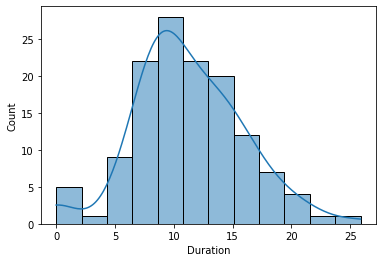

In [23]:
sns.histplot(data=data,x='Duration',kde=True)

### best fitting distribution

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [lognorm    ] [0.10 sec] [RSS: 0.000875691] [loc=-90.455 scale=101.590]
[distfit] >INFO> [weibull_min] [0.02 sec] [RSS: 0.00135114] [loc=-3.770 scale=16.639]
[distfit] >INFO> [gamma      ] [0.04 sec] [RSS: 0.000883206] [loc=-58.218 scale=0.306]
[distfit] >INFO> [norm       ] [0.00 sec] [RSS: 0.00101781] [loc=11.244 scale=4.613]
[distfit] >INFO> [uniform    ] [0.00 sec] [RSS: 0.012571] [loc=0.000 scale=25.870]
[distfit] >INFO> [expon      ] [0.00 sec] [RSS: 0.0180091] [loc=0.000 scale=11.244]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Lognorm(loc:-90.455423, scale:101.589595)
[distfit] >INFO> Create cdf plot for the parametric method.
[distfit] >INFO> Ploting CDF


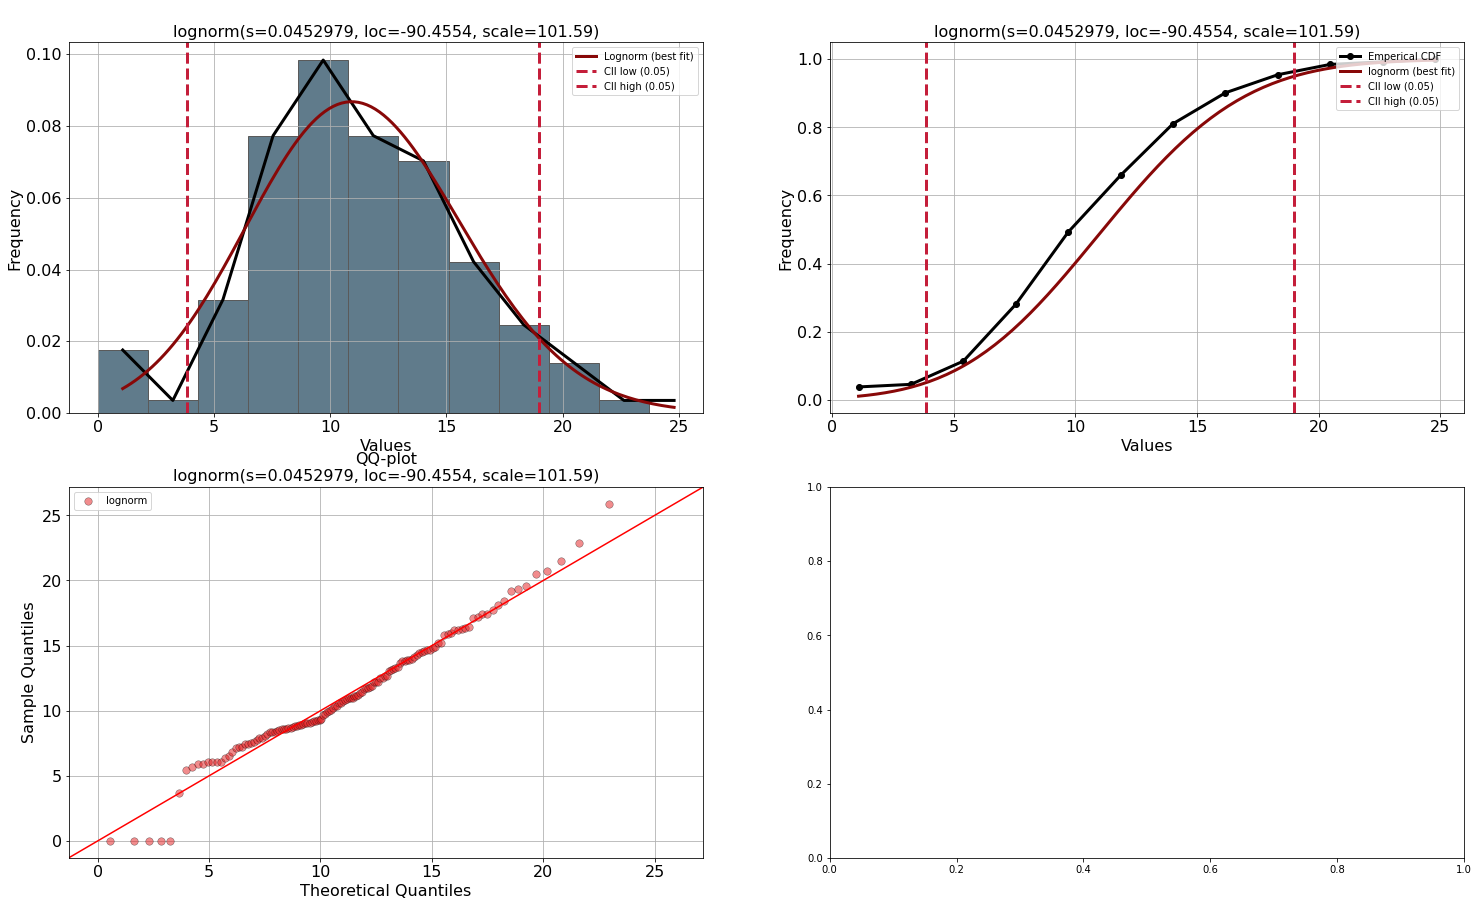

In [24]:
#Fitting JUST the best distribution plot
dfit = fit.distfit(distr=["lognorm","weibull_min","gamma","norm","uniform","expon"],alpha=0.05)

# Fit
dfit.fit_transform(data["Duration"])

# Plot 
fig, axs = plt.subplots(2,2, figsize=(25,15))
fig, ax  = dfit.plot(chart='pdf', n_top=1,ax=axs[0, 0])
fig, ax  = dfit.plot(chart='cdf', n_top=1,ax=axs[0, 1])
fig, ax  = dfit.qqplot(data['Duration'], n_top=1,ax=axs[1, 0])

In [14]:
# ln=np.random.lognormal(sigma=0.038,mean=1.942,size=208)
# ln
# pp_x = sm.ProbPlot(ln, fit=True)
# pp_x.ppplot(line="45",marker='o', markerfacecolor='pink', markersize=4,markeredgecolor='red',ax=axs[1,1])
# axs[1,1].grid(True, color='gray', linestyle='-', linewidth=0.5)
# plt.title("PP Plot")
# plt.show()

In [15]:
# from fitter import Fitter

# f = Fitter(Empirical_Data['Duration'],
#            distributions=["lognorm","weibull_min","gamma","norm","uniform","expon"])
# f.fit()
# f.summary()